In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset NOTE: 
#   Dataset is too large to use in the repository so it is not included
#   Preprocessed data set is included in the repository
#   The preprocessed data set is created by running the following code:
data = pd.read_csv("fitness_tracker_dataset.csv")
df = pd.DataFrame(data)

df.head()

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral


## EDA

In [2]:
# print column info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1000000 non-null  int64  
 1   date                1000000 non-null  object 
 2   steps               1000000 non-null  int64  
 3   calories_burned     1000000 non-null  float64
 4   distance_km         1000000 non-null  float64
 5   active_minutes      1000000 non-null  int64  
 6   sleep_hours         1000000 non-null  float64
 7   heart_rate_avg      1000000 non-null  int64  
 8   workout_type        856880 non-null   object 
 9   weather_conditions  1000000 non-null  object 
 10  location            1000000 non-null  object 
 11  mood                1000000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 91.6+ MB
None


In [3]:
# number of unique values for each column
print(df.nunique())

user_id                  999
date                    1000
steps                  30000
calories_burned       245477
distance_km             2001
active_minutes          1440
sleep_hours              121
heart_rate_avg           120
workout_type               6
weather_conditions         4
location                   5
mood                       4
dtype: int64


In [4]:
# summarize data
print(df.describe())

              user_id           steps  calories_burned     distance_km  \
count  1000000.000000  1000000.000000   1000000.000000  1000000.000000   
mean       499.550302    15005.767061      2750.008148        9.994465   
std        288.166608     8659.195341       721.473950        5.774298   
min          1.000000        0.000000      1500.000000        0.000000   
25%        250.000000     7492.000000      2125.517500        4.990000   
50%        499.000000    15020.000000      2748.310000        9.990000   
75%        749.000000    22507.000000      3375.190000       14.990000   
max        999.000000    29999.000000      4000.000000       20.000000   

       active_minutes     sleep_hours  heart_rate_avg  
count  1000000.000000  1000000.000000  1000000.000000  
mean       719.418241        6.000228      119.458316  
std        415.894771        3.463977       34.654034  
min          0.000000        0.000000       60.000000  
25%        359.000000        3.000000       89.000000

## Data Preprocessing

In [5]:
# Reduce dataset with quntitle samlping to ensure mix of values across key metrics
df['sleep_quantile'] = pd.qcut(df['sleep_hours'], q=4, labels=False)
df = df.groupby('sleep_quantile').apply(lambda x: x.sample(n=2500, random_state=42)).reset_index(drop=True)

/var/folders/9z/hk8t7rjx6ts_2ft5jl2v91nh0000gn/T/ipykernel_58377/812224526.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('sleep_quantile').apply(lambda x: x.sample(n=2500, random_state=42)).reset_index(drop=True)


In [6]:
# # Sort by date in descending order (most recent first)
# df_sorted = df.sort_values(by='date', ascending=False)

# # Select the 10,000 most recent entries
# df = df_sorted.head(10000)

# # Save or use the filtered data
# df.nunique()

In [7]:
# # Reduce the dataset and keep users with the most recorded entries

# # Count the number of records per user
# user_counts = df['user_id'].value_counts().reset_index()

# # Determine how many users are needed to get ~10,000 rows
# user_counts['cumulative_sum'] = user_counts['count'].cumsum()
# top_users = user_counts[user_counts['cumulative_sum'] <= 10000]['user_id']

# # Filter the dataset to keep only the selected users
# df = df[df['user_id'].isin(top_users)]

# df.nunique()

In [8]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# column for day of the week
df['day_of_week'] = df['date'].dt.day_name()

# column for dialy reccomended sleep
df['below_avg_sleep'] = np.where(df['sleep_hours'] < 7, 1, 0)

# column for type workout intensity
def categorize_intensity(workout):
    low_intensity = ['Yoga', 'Walking']
    medium_intensity = ['Cycling', 'Swimming']
    high_intensity = ['Running', 'Gym Workout']
    
    if workout in low_intensity:
        return 'Low'
    elif workout in medium_intensity:
        return 'Medium'
    elif workout in high_intensity:
        return 'High'
    else:
        pass 

df["workout_intensity"] = df["workout_type"].apply(categorize_intensity)

# save the new dataset
df.to_csv("fitness_tracker_dataset_preprocessed.csv", index=False)

# show new dataset 
df.head()


,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood,sleep_quantile,day_of_week,below_avg_sleep,workout_intensity
0,660,2025-02-27,15995,2877.14,8.15,1377,1.4,95,NaN,Snow,Gym,Stressed,0,Thursday,1,None
1,761,2025-01-11,2343,3320.13,0.06,509,0.8,162,Running,Snow,Park,Neutral,0,Saturday,1,High
2,398,2024-06-16,14555,3082.19,8.10,564,0.6,120,Walking,Snow,Gym,Tired,0,Sunday,1,Low
3,984,2023-10-15,29850,3875.64,4.56,525,2.8,164,Walking,Snow,Home,Happy,0,Sunday,1,Low
4,236,2023-10-18,15676,2551.24,13.51,331,0.3,162,Cycling,Rain,Other,Stressed,0,Wednesday,1,Medium


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# load the preprocessed dataset - this is the dataset that will be used for the analysis
# use this dataset to avoid running the preprocessing code each time
data = pd.read_csv("fitness_tracker_dataset_preprocessed.csv")
df = pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             10000 non-null  int64  
 1   date                10000 non-null  object 
 2   steps               10000 non-null  int64  
 3   calories_burned     10000 non-null  float64
 4   distance_km         10000 non-null  float64
 5   active_minutes      10000 non-null  int64  
 6   sleep_hours         10000 non-null  float64
 7   heart_rate_avg      10000 non-null  int64  
 8   workout_type        8514 non-null   object 
 9   weather_conditions  10000 non-null  object 
 10  location            10000 non-null  object 
 11  mood                10000 non-null  object 
 12  sleep_quantile      10000 non-null  int64  
 13  day_of_week         10000 non-null  object 
 14  below_avg_sleep     10000 non-null  int64  
 15  workout_intensity   8514 non-null   object 
dtypes: fl

## Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

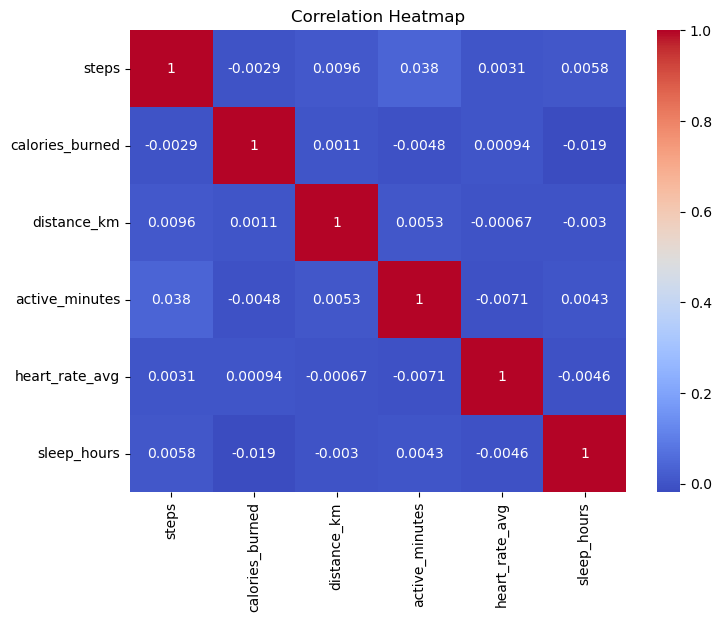

In [5]:
# normalize numerical columns
scaler = StandardScaler()
df_norm = df.copy()
numerical_cols = ['steps', 'calories_burned', 'distance_km', 'active_minutes', 'heart_rate_avg', 'sleep_hours']
df_norm[numerical_cols] = scaler.fit_transform(df_norm[numerical_cols])

# find numerical columns with highest correlation
corr_matrix = df_norm[numerical_cols].corr()

#  create heat map to find columns with highest correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cycling'),
  Text(1, 0, 'Gym Workout'),
  Text(2, 0, 'Running'),
  Text(3, 0, 'Swimming'),
  Text(4, 0, 'Walking'),
  Text(5, 0, 'Yoga')])

<Figure size 1200x600 with 0 Axes>

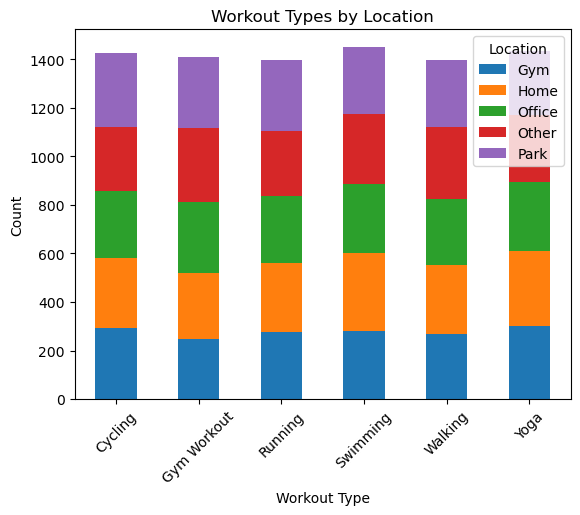

In [6]:
plt.figure(figsize=(12, 6))
workout_loc = pd.crosstab(df['workout_type'], df['location'])
workout_loc.plot(kind='bar', stacked=True)
plt.title('Workout Types by Location')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.legend(title='Location')
plt.xticks(rotation=45)

Text(0, 0.5, 'Steps')

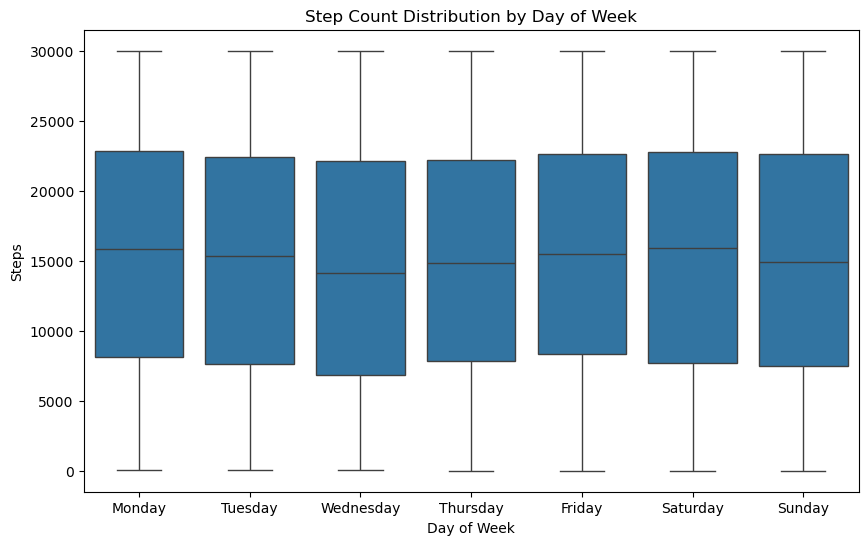

In [7]:
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=df, x='day_of_week', y='steps', order=order)
plt.title('Step Count Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Steps')

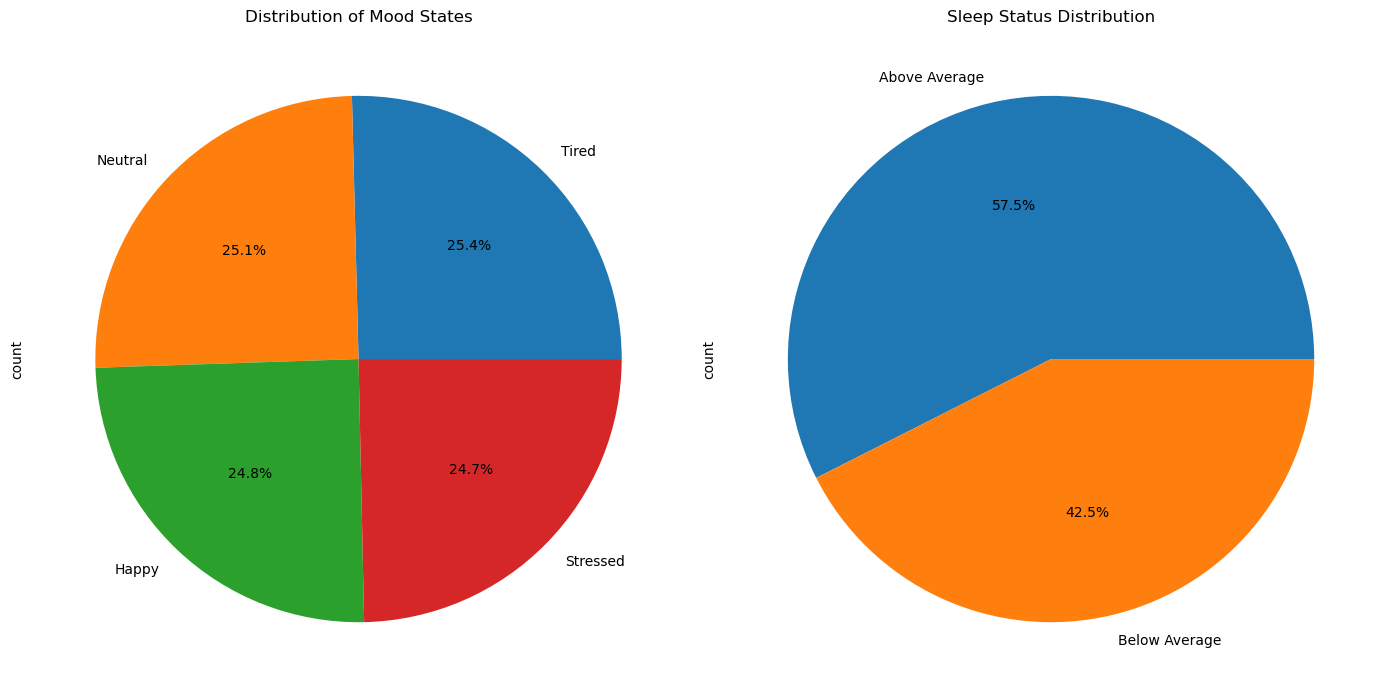

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Mood distribution
df['mood'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Mood States')

# Sleep status distribution
df['below_avg_sleep'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], labels=['Above Average', 'Below Average'])
axes[1].set_title('Sleep Status Distribution')

plt.tight_layout()

In [24]:
sleep_by_day = df.groupby("day_of_week")["sleep_hours"].mean().reset_index()

alt.Chart(sleep_by_day).mark_line(point=True).encode(
    x=alt.X("day_of_week:N", sort=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]),
    y="sleep_hours:Q",
    tooltip=["day_of_week", "sleep_hours"]
).properties(
    title="Average Sleep Hours by Day of the Week"
)

alt.Chart(...)